# 明日方舟 十连三金/四金/白光 概率与样本分析
Analyzing ten-pull triple-six/quadra-six-and-above/all-white in Arknights gacha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

## 0. 大保底对十连多金概率的影响

十连抽出多金时，第一个六星干员的概率受到大保底影响，为抽六星的综合概率；之后保底即重置，抽六星的概率为$p_6 = 0.02$。

因此，需要算出抽出六星干员的综合概率$p_6'$。考虑一个无限次抽卡的序列，每相邻两次六星之间的抽数间隔是一个随机变量，记作$N_{int}$。六星卡在序列中占的比例即为$p_6'$，有
$$
    p_6' = \frac{1}{\mathbf{E}[N_{int}]+1}
$$
该抽数期望在潭中已达成共识($\mathbf{E}[N_{int}]+1=34.59$)，为保证结论严谨，仍将计算过程写出。

将“连续n抽没有六星的前提下，下一抽抽到六星的概率”记为$\mathbf{P}[6 | N_{int}=n]$。
$$
    \mathbf{P}[6 \mid N_{int}=n] = 0.02, \quad\quad\quad\quad n=0,1,\ldots,49\quad
$$
$$
    \mathbf{P}[6 \mid N_{int}=n] = 0.02 (n-48), \quad n=50,51,\ldots,98
$$

将“连续n抽没有六星，且第n+1抽抽到六星的概率”记为$\mathbf{P}[N_{int}=n]$。
$$
    \mathbf{P}[N_{int}=n] = \prod_{k=0}^{n-1} (1-\mathbf{P}[6 \mid N_{no6}=k]) 
        \times \mathbf{P}[6 \mid N_{int}=n]
$$

最后可求得
$$
    p_6' = 0.0289
$$

以下为有关代码

In [2]:
# after n pulls without 6, the probability of pull 6. n in 0-98
p6_list = [0.02 for n in range(0,50)] + [0.02*(n-48) for n in range(50,99)] 
p6_list = np.array(p6_list)

# after probability of n pulls without 6 and pull six. n in 0-98
pint_list = [np.prod(1-p6_list[0:n]) * p6_list[n] for n in range(0,99)]
pint_list = np.array(pint_list)

# the comprehensive probability of pulling 6
N_exp = np.sum(np.arange(99)*pint_list)+1
p6_prime = 1/N_exp

print("抽出六星干员需要的抽数期望为：{:.4g}".format(N_exp))
print("抽出六星干员的综合概率为：{:.4g}".format(p6_prime))
p6 = 0.02

抽出六星干员需要的抽数期望为：34.59
抽出六星干员的综合概率为：0.02891


## 1. 十连多金概率计算
一次十连中出现$m$张六星卡可分解为如下步骤:  
前k张无六星 -> 第k+1张为第一张六星 -> 之后9-k张中有m-1张六星

其概率为
$$
    \mathbf{P}[m] = \sum_{k=0}^{10-m} (1-p_6')^k p_6' \binom{9-k}{m-1} p_6^{m-1} (1-p_6)^{10-m-k}, m=1,2,\ldots,10
$$
(前k张无六星的概率算法其实并不精确，但误差应该不大)
计算结果如下

In [3]:
pm6_list = [np.sum([(1-p6_prime)**k * p6_prime * comb(9-k,m-1) * p6**(m-1) * (1-p6)**(10-m-k) for k in range(11-m)])
          for m in range(1,11)]
p_no6 = (1-p6_prime)**10
print("十连0六星概率：{:.4g}".format(p_no6))
for a,p in enumerate(pm6_list):
    print("十连{:d}六星概率：{:.4g}".format(a+1,p))
print("全概率为：{:.4g}".format(p_no6+np.sum(pm6_list)))

十连0六星概率：0.7458
十连1六星概率：0.2314
十连2六星概率：0.02161
十连3六星概率：0.001186
十连4六星概率：4.255e-05
十连5六星概率：1.046e-06
十连6六星概率：1.782e-08
十连7六星概率：2.082e-10
十连8六星概率：1.596e-12
十连9六星概率：7.245e-15
十连10六星概率：1.48e-17
全概率为：1


## 2. 十连三金 / 十连四金及以上

记“十连三金”为事件B，概率为$b$。有
$$
    b = 1.186 \times 10^{-3}
$$
约为 万分之12

记“十连四金及以上”为事件C，概率为$c$。有
$$
    c = 4.362 \times 10^{-5}
$$
不到 十万分之5

In [4]:
b = pm6_list[2]
c = np.sum(pm6_list[3:])
print("十连三金 综合概率为：{:.4g}".format(b))
print("十连四金及以上 综合概率为：{:.4g}".format(c))

十连三金 综合概率为：0.001186
十连四金及以上 综合概率为：4.362e-05


## 3. 十连白光

假定不存在隐藏保底机制，记“十连白光”为事件A，概率为$a$。

在不触发大小保底的前提下。有
$$
    a' = 0.4^{10} = 1.049 \times 10^{-4}
$$

实际抽卡时，大小保底都会降低十连白光的概率，小保底为主要影响因素。取一个**保守**估计值
$$
    a = 5 \times 10^{-5}
$$
即“十连白光”的概率为十万分之5。  
这是一个非常保守的估计，相当于假定一半的十连都触发了小保底。

In [5]:
a_prime = 0.4**10
print("不触发大小保底情况下 十连白光 概率为：{:.4g}".format(a_prime))
a = 5e-5
print("保守估计 十连白光 综合概率为：{:.4g}".format(a))

不触发大小保底情况下 十连白光 概率为：0.0001049
保守估计 十连白光 综合概率为：5e-05


## 4. 事件发生次数间的相关性
现在我们已经知道“十连白光”、“十连三金”、“十连四金及以上”发生的概率，也知道了一组样本(全体“晒图党”的十连)中这三个事件发生的次数。不妨考虑这样一个问题：


- 已知：事件X发生概率为x，发生了$k$次；事件Y发生概率为y，且与事件X互斥。
- 求：事件Y发生$s$次的概率是多少？

分析这个问题，需要考虑“$X$事件发生第$k$次时，实验的总次数”。该数值是一个随机变量，记为$N$。$N$服从[帕斯卡分布](https://baike.baidu.com/item/%E5%B8%95%E6%96%AF%E5%8D%A1%E5%88%86%E5%B8%83/1188907)，其概率为
$$
    \mathbf{P}[N=n \mid n_X=k] = \binom{n-1}{k-1} x^k (1-x)^{n-k}, n=k,k+1,\ldots
$$
注：由于存在两种定义，网络上帕斯卡分布的信息较为混乱。[帕斯卡分布：两个数学期望，一个方差？](https://zhuanlan.zhihu.com/p/36270529)中有解释。

之后，可计算在“实验总次数$N=n$ 时，$X$事件发生第$k$次”的条件下，“$Y$事件发生$s$次”的概率。   
(不知为啥，在markdown cell里写的latex code在本地能渲染，在github上就不行，必须在code cell里写)

In [6]:
%%latex
\begin{aligned}
    &\quad \mathbf{P}[n_Y=s \mid N=n, n_X=k] \\
    &= \binom{n-k}{s} \mathbf{P}[\neg Y \mid \neg X]^{n-k-s} \mathbf{P}[Y \mid \neg X]^{n-k} \\
    &= \binom{n-k}{s} \bigg(\frac{1-x-y}{1-x}\bigg)^{n-k-s} \bigg(\frac{y}{1-x}\bigg)^{s}
\end{aligned}

<IPython.core.display.Latex object>

因此，在“$X$事件发生第$k$次”的条件下，“$Y$事件发生$s$次”的概率为

In [7]:
%%latex
\begin{aligned}
    &\quad \mathbf{P}[n_Y=s \mid n_X=k] \\
    &= \sum_{n=k+s}^{\infty} \mathbf{P}[n_Y=s \mid N=n, n_X=k] \mathbf{P}[N=n \mid n_X=k] \\
    &= \sum_{n=k+s}^{\infty} \binom{n-k}{s} \bigg(\frac{1-x-y}{1-x}\bigg)^{n-k-s} 
        \bigg(\frac{y}{1-x}\bigg)^{s} \binom{n-1}{k-1} x^k (1-x)^{n-k} \\
    &= \sum_{n=k+s}^{\infty} \binom{n-1}{k-1} \binom{n-k}{s} x^k y^s (1-x-y)^{n-k-s} \\
    &= \sum_{n=k+s}^{\infty} \frac{(n-1)!}{s! (k-1)! (n-k-s)!} x^k y^s (1-x-y)^{n-k-s} \\
    &= \sum_{n=k+s}^{\infty} \frac{(k+s-1)!}{s! (k-1)!} \frac{(n-1)!}{(k+s-1)! (n-k-s)!} 
        x^k y^s (1-x-y)^{n-k-s} \\
    &= \sum_{n=k+s}^{\infty} \binom{k+s-1}{s} \binom{n-1}{k+s-1} x^k y^s (1-x-y)^{n-k-s} \\
    &= \binom{k+s-1}{s} \frac{x^k y^s}{(x+y)^{k+s}} \quad
        \sum_{n=k+s}^{\infty} \binom{n-1}{k+s-1} (x+y)^{k+s} [1-(x+y)]^{n-(k+s)} \\
\end{aligned}

<IPython.core.display.Latex object>

注意，右侧求和部分恰是一个“概率为$x+y$的事件发生第$k+s$次”的帕斯卡分布的全概率，其值为1，可以继续化简

In [8]:
%%latex
\begin{aligned}
    &\quad \mathbf{P}[n_Y=s \mid n_X=k] \\
    &= \binom{k+s-1}{s} \frac{x^k y^s}{(x+y)^{k+s}} \quad
        \sum_{n=k+s}^{\infty} \binom{n-1}{k+s-1} (x+y)^{k+s} [1-(x+y)]^{n-(k+s)} \\
    &= \binom{k+s-1}{s} \frac{x^k y^s}{(x+y)^{k+s}} \\
    &= \binom{k+s-1}{s} \bigg(\frac{1}{1+y/x}\bigg)^k \bigg(\frac{1}{1+x/y}\bigg)^s
\end{aligned}

<IPython.core.display.Latex object>

特别的，当$s=0$时，
$$
    \mathbf{P}[n_Y=0 \mid n_X=k] = \bigg(\frac{1}{1+y/x}\bigg)^k
$$

## 5. 理论联系实际
取[海豹楼](https://ngabbs.com/read.php?tid=17069396)中回帖的潭友抽过的全部十连为实验样本，记"十连抽到并晒出十连白光/十连三金/十连四金及以上"为事件$A_S$，$B_S$，$C_S$，对应概率为$a_S$，$b_S$，$c_S$。

考虑到潭友们也不是抽到必晒，晒出来的概率应该等于抽到的概率乘一个系数，我称为“晒率”。关系如下
$$
    a_S = s_a a
$$
$$
    b_S = s_b b
$$
$$
    c_S = s_c c
$$

十连白光概率很低，还是都市传说，可以合理推断它的晒率最高；十连四金显然比十连三金更欧，晒率也应该更高。即
$$
    s_a > s_c > s_b
$$

通过艰辛的爬海豹楼收集数据（期间各位欧皇亮瞎我狗眼千百遍），截至北京时间2020Feb18 12:00，在海豹楼前2825楼中，共统计得三金截图**212**张，四金及以上截图**26**张(其中包含五金截图2张)。

我也在潭里和网络上搜索了“十连白光”，至今没有可信的截图，遑论视频。潭内有水贴[真4的有十连白光吗](https://ngabbs.com/read.php?tid=20071860)和[有十连出白光的吗](https://ngabbs.com/read.php?tid=19572007)，第一个帖中无人秀截图，第二个贴中46楼的截图，9号位的卡缇上方有明显涂黑，且类似的涂抹痕迹不止一处。

套用公式，已知实验样本中“十连三金”出现212次，“十连白光”出现0次的概率为
$$
    \mathbf{P}[n_{A_S}=0 \mid n_{B_S}=212] = \bigg(\frac{1}{1+a_S/b_S}\bigg)^{212} < \bigg(\frac{1}{1+a/b}\bigg)^{212} 
        = 1.6 \times 10^{-4}
$$
不到万分之2

已知实验样本中“十连四金”出现27次，“十连白光”出现0次的概率为
$$
    \mathbf{P}[n_{A_S}=0 \mid n_{C_S}=26] = \bigg(\frac{1}{1+a_S/c_S}\bigg)^{26} < \bigg(\frac{1}{1+a/c}\bigg)^{26} 
        = 2.4 \times 10^{-9}
$$
已经是可以忽略的数字了，比只抽了一发十连直接抽到六金还小。

**注**：为什么两个概率不一样？  
两个概率都是“十连白光出现0次”概率的上界，由于无法准确得知晒率，这个上界是按照$s_a = s_b = s_c$(三种情况的晒率相同)计算得到的。实际上，“十连四金”晒率必定高于“十连三金”。  
如果假定$s_a = s_c = 2s_b$的话，通过“十连三金”次数推出“十连白光出现0次”的概率变为$3.5 \times 10^{-8}$，就和通过“十连四金”次数推出的结果比较接近了。

In [9]:
n_AS = 0
n_BS = 212
n_CS = 26

p1 = (1/(1+a/b))**n_BS
print("已知实验样本中“十连三金”出现{:d}次，则“十连白光出现0次”的概率小于:{:.4g}".format(n_BS, p1))

p2 = (1/(1+a/c))**n_CS
print()
print("已知实验样本中“十连四金”出现{:d}次，则“十连白光出现0次”的概率小于:{:.4g}".format(n_CS, p2))

print()
print("一发十连，直接抽到十连六金的概率：{:.4g}".format(pm6_list[5]))

p1_prime = (1/(1+2*a/b))**n_BS
print()
print("假定“十连白光”的晒率是“十连三金”晒率的两倍，则“十连白光出现0次”的概率为:{:.4g}".format(p1_prime))

已知实验样本中“十连三金”出现212次，则“十连白光出现0次”的概率小于:0.0001573

已知实验样本中“十连四金”出现26次，则“十连白光出现0次”的概率小于:2.376e-09

一发十连，直接抽到十连六金的概率：1.782e-08

假定“十连白光”的晒率是“十连三金”晒率的两倍，则“十连白光出现0次”的概率为:3.502e-08


## 6. 附录：用蒙特卡洛方法验证概率公式的正确性
为验证公式
$$
    \mathbf{P}[n_Y=s \mid n_X=k] = \binom{k+s-1}{s} \bigg(\frac{1}{1+y/x}\bigg)^k \bigg(\frac{1}{1+x/y}\bigg)^s
$$
进行10万次模拟实验，观察结果。

In [10]:
# parameters
N = 100000
k = 20
x = 0.3
y = 0.2
ny_range = 40

In [11]:
# Theoretical results
s_list = np.arange(ny_range+1)
p_list = np.array([comb(k+s-1,s) / (1+y/x)**k / (1+x/y)**s for s in s_list])

In [12]:
# Monte Carlo simulation
np.random.seed(20200219)
result_arr = np.zeros((N,3), dtype=np.int) # store result, each row contains (n_X, n_other, n_Y)
for a in range(N):
    while result_arr[a,0]<k:
        roll_point = np.random.rand()
        if roll_point < x:
            result_arr[a,0] += 1
        elif roll_point > 1-y:
            result_arr[a,2] += 1
        else:
            result_arr[a,1] += 1
            
assert np.all(result_arr[:,0]==k)

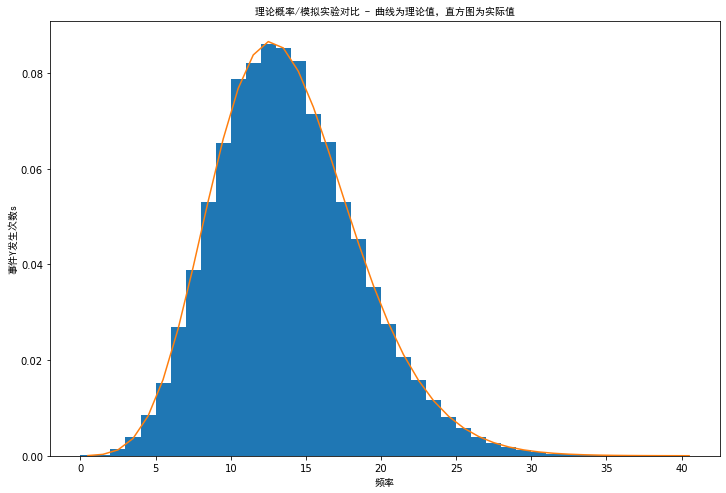

In [13]:
# Show results
S = result_arr[:,2]
plt.figure(figsize=(12,8))
plt.hist(S, weights=np.ones_like(S) / len(S), range=(0,ny_range), bins=ny_range)
plt.plot(s_list+0.5, p_list)
plt.title("理论概率/模拟实验对比 - 曲线为理论值，直方图为实际值", fontproperties = 'SimHei')
plt.xlabel("频率", fontproperties = 'SimHei')
plt.ylabel("事件Y发生次数s", fontproperties = 'SimHei')
plt.show()